In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt

In [2]:
import matplotlib.font_manager as fm
fe = fm.FontEntry(
  fname=r'font/NanumGothic.ttf',
  name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.family':'NanumGothic', 'font.size':14})
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import pandas as pd
import numpy as np

#### 삼각 그리드(triangular grid)  
사각형 영역 뿐 아니라 임의의 영역에서도 각종 차트를 그릴수 있어서 정의역이 직사각형이 아닌 2차원 함수도 시각화 할 수 있음  
matplotlib에서 삼각 그리드를 사용할 땐 tri 하위 패키지를 사용  
```python
import matplotlib.tri as mtri
```

In [4]:
import matplotlib.tri as mtri

#### 삼각 그리드 생성  
`Triangulation` 클래스로 삼각 그리드를 생성할 수 있음  
`Triangulation` 클래스의 생성자는 x, y, triangles 세 개의 인수를 받음
`triangles` 는 각 점의 기하학적 위상 정보를 담고 있음

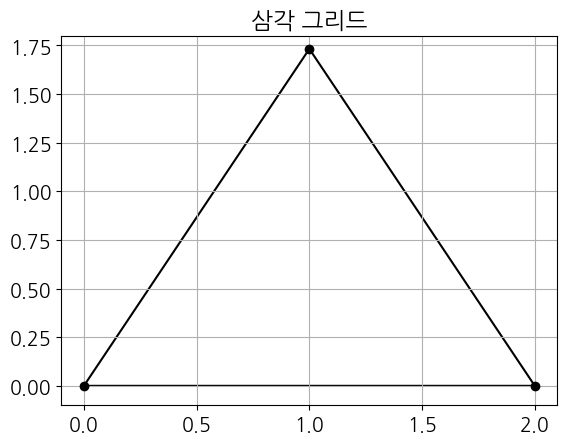

In [13]:
x = np.array([0, 1, 2])
y = np.array([0, np.sqrt(3), 0])
triangles = [[0, 1, 2]]
triangle = mtri.Triangulation(x, y, triangles)

plt.title('삼각 그리드')
plt.triplot(triangle, 'ko-')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 1.8)
plt.grid(True)

plt.show()

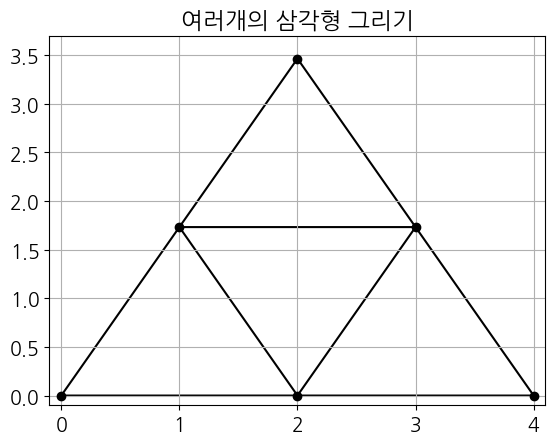

In [25]:
x = np.asarray([0, 1, 2, 3, 4, 2])
y = np.asarray([0, np.sqrt(3), 0, np.sqrt(3), 0, 2*np.sqrt(3)])
triangles = [[0, 1, 2], [2, 3, 4], [1, 2, 3], [1, 3 , 5]]
triangle = mtri.Triangulation(x, y, triangles)

plt.title('여러개의 삼각형 그리기')
plt.triplot(triangle, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.grid(True)

plt.show()

#### 삼각 그리드 세분화
`TriRefiner`, `UniformTriRefiner` 클래스로 그리드를 세분화 할 수 있음  
`refiner_triangulation()` : 단순히 삼각 그리드를 세분화  
`refine_field()` : 실제 함수에 최적화된 삼각 그리드 생성

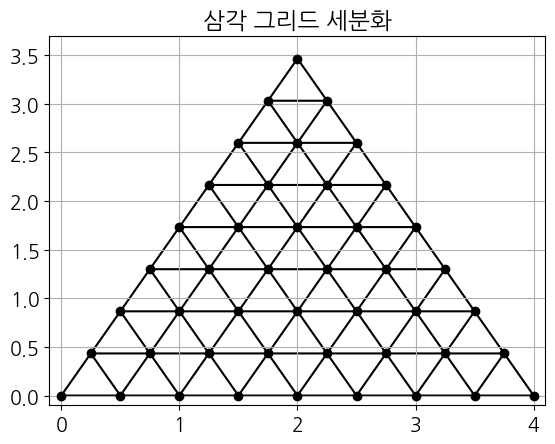

In [31]:
refiner = mtri.UniformTriRefiner(triangle)
triangle2 = refiner.refine_triangulation(subdiv =2)

plt.title('삼각 그리드 세분화')
plt.triplot(triangle2, 'ko-')
plt.xlim(-0.1, 4.1)
plt.ylim(-0.1, 3.7)
plt.grid(True)

plt.show()

#### 삼각 그리드 플롯  
삼차원 그리드 상에 `tricontour`, `tricontourf`, `plot_trisur`, `plot_trisurf`를 사용해 2차원 등고선이나 3차원 표면을 그릴 수 있음

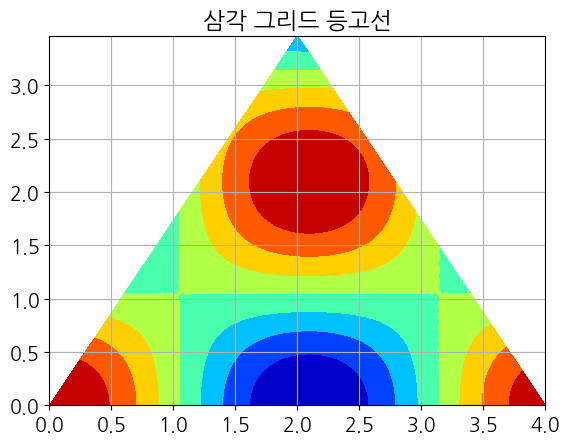

In [40]:
triangle3 = refiner.refine_triangulation(subdiv=5)
z5 = np.cos(1.5 * triangle3.x) * np.cos(1.5 * triangle3.y)

plt.title('삼각 그리드 등고선')
plt.tricontourf(triangle3, z5, cmap='jet')
plt.grid(True)
plt.show()

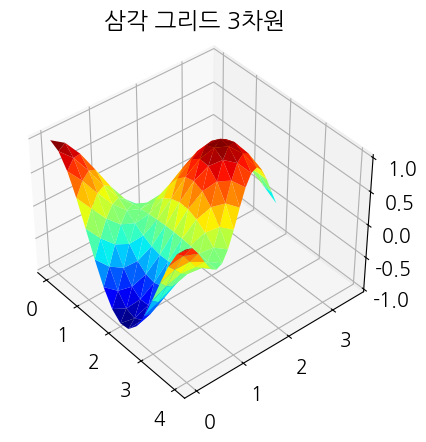

In [50]:
triangle4 = refiner.refine_triangulation(subdiv=3)
z = np.cos(1.5* triangle4.x) * np.cos(1.5*triangle4.y)

axes = plt.axes(projection='3d')
axes.set_title('삼각 그리드 3차원')

axes.plot_trisurf(triangle4.x, triangle4.y, z, cmap='jet', linewidth= 0.2)
axes.set_zlim(-1, 1)
axes.view_init(40, -40) # x - 위아래 / y - 좌우
plt.show()